**Write a function to count the number of parameters in a convolutional layer.** Your function should take as input the number of input channels, the number of output channels, the kernel size, and whether to perform a trainable shift. Give it the following signature:

```def count_parameters_conv(in_channels: int, out_channels: int, kernel_size: int, bias: bool):```

In [1]:
def count_parameters_conv(in_channels: int, out_channels: int, kernel_size: int, bias: bool):

    if bias:
        return (in_channels*kernel_size**2  + 1)*out_channels
    else:
        return (in_channels*kernel_size**2)*out_channels

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
from IPython.display import clear_output
from PIL import Image
from matplotlib import cm
from time import perf_counter
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tqdm

warnings.filterwarnings('ignore')

mnist_train = MNIST(
    "../datasets/mnist",
    train=True,
    download=True,
    transform=T.ToTensor()
)

mnist_valid = MNIST(
    "../datasets/mnist",
    train=False,
    download=True,
    transform=T.ToTensor()
)

train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
valid_loader = DataLoader(mnist_valid, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12701831.55it/s]


Extracting ../datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../datasets/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 338523.88it/s]


Extracting ../datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2729614.85it/s]


Extracting ../datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2745032.96it/s]

Extracting ../datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/mnist/MNIST/raw



**Train a convolutional neural network for classification on the MNIST dataset.**

Achieve 99.3% accuracy on the test sample.

You can use the previously written ```train``` and ```evaluate``` functions.

So that we can check your model, write a function that creates your model and returns an object. Name the function ```create_conv_model```, without arguments. You will need to save your model weights and submit them to the tester. To do this, use the torch.save and state_dict methods.

In [57]:

def create_conv_model():

    conv_model = nn.Sequential(
        
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1, padding_mode='reflect'),
    nn.ReLU(),  
    nn.MaxPool2d(kernel_size=2),
        
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    nn.ReLU(),                   
    nn.MaxPool2d(kernel_size=2), 
                
    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, padding_mode='reflect'),
    nn.ReLU(),                
    nn.MaxPool2d(kernel_size=2), 
    
    nn.Flatten(),
    nn.Linear(3 * 3 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),       
    nn.Linear(128, 10)
    )
        
    return conv_model


def train(model: nn.Module) -> float:
    model.train()

    train_loss = 0

    for x, y in tqdm(train_loader, desc='Train'):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)
    
    return train_loss

@torch.inference_mode()
def evaluate(model: nn.Module, loader: DataLoader) -> tuple[float, float]:
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(loader, desc='Evaluation'):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    total_loss /= len(loader)
    accuracy = correct / total

    return total_loss, accuracy

def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    valid_accuracy: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(valid_accuracy)
    plt.grid()

    plt.show()

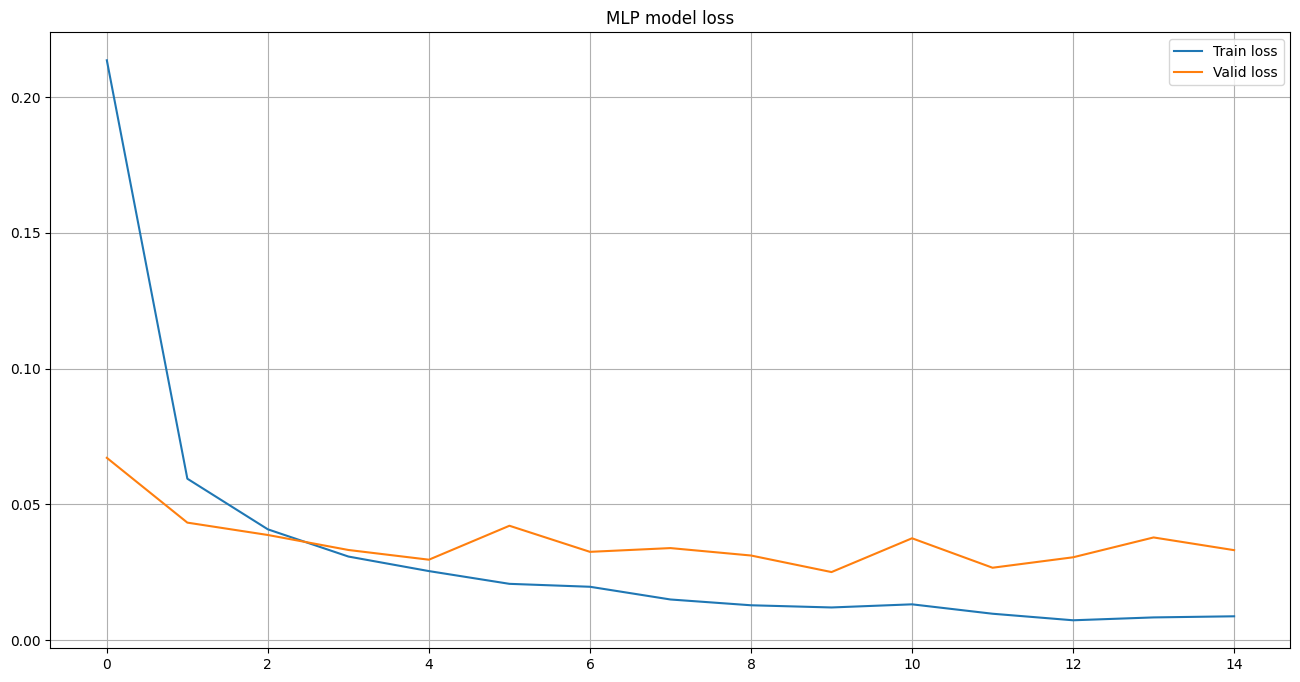

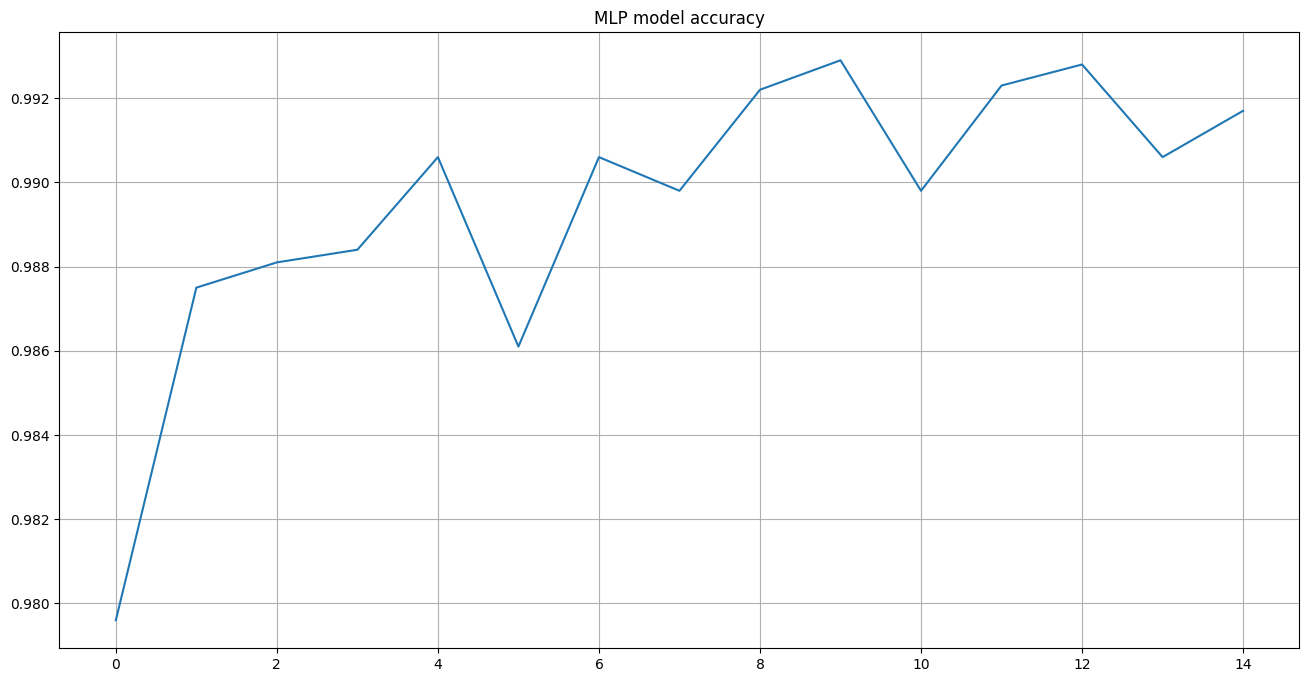

Total training and evaluation time 547.41509


In [68]:
model = create_conv_model()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

num_epochs = 15

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(model)

    valid_loss, valid_accuracy = evaluate(model, valid_loader)
    
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)
    
    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')
    
    if valid_accuracy >= 0.995:
        break
    
print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [59]:
valid_accuracy


0.9936

In [66]:
torch.save(model.state_dict(), "/kaggle/working/model_1.pt")